# __Project_NoraKhanaghyan__

## _1. Loading and manipulating data_

In [1]:
import matplotlib
%matplotlib inline
import pandas as pd

In [2]:
data = pd.read_csv("yelp_data.csv", index_col = 1) #read data


In [3]:
for ix, name in enumerate(data.columns):
    print (ix,name)

0 Unnamed: 0
1 cool
2 date
3 eliteStatus
4 friends
5 funny
6 location
7 name
8 phone
9 ratings
10 review
11 reviewHistory
12 useful
13 userlink
14 username


In [4]:
data = data.drop(data.columns[[0,13]], axis=1)

In [5]:
data['date'] = pd.to_datetime(data['date'])


## _2. Importing Stop words_

In [6]:
stop = pd.read_csv("yelp.stop", names =["words"])

In [7]:
stop_list=stop['words'].values.tolist()

## _3. LDA_

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split

### Only 200 features

In [10]:
vec_200 = CountVectorizer(token_pattern= "[a-zA-Z']{3,}",decode_error ='ignore', lowercase=True, stop_words = stop_list, max_features = 200)

In [11]:
sparse_matrice = vec_200.fit_transform(data.review)

In [12]:
pd.DataFrame(sparse_matrice.toarray(), columns = vec_200.get_feature_names()).head()


,abalone,amazing,ambiance,appetizer,area,asian,asked,astoria,ate,atmosphere,...,udon,waiter,waiters,wanted,water,watermelon,worth,years,yelp,yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0


In [13]:
sparse_matrice

<666x200 sparse matrix of type '<class 'numpy.int64'>'
	with 10232 stored elements in Compressed Sparse Row format>

In [14]:
X_train_200, X_test_200 = train_test_split(sparse_matrice, test_size=0.20, random_state=42) ## 80 -20 split

In [15]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [16]:
for i in range(5,55,10):
    lda_200 = LatentDirichletAllocation(n_components= i, max_iter=450, 
                                        topic_word_prior= 0.01, 
                                        doc_topic_prior=1,
                                        learning_method='batch',
                                        n_jobs= 1,random_state=275) 
    topic_components_200 = lda_200.fit_transform(X_train_200)
    print_top_words(lda_200,vec_200.get_feature_names(), 5) #print the top 5 words!
    print(i,lda_200.perplexity(X_test_200))
    print('\n')
    
    

Topic #0:
spicy dish rice noodles sauce
Topic #1:
dishes korean give big atmosphere
Topic #2:
seafood pot octopus live hot
Topic #3:
friends table eating beef things
Topic #4:
thai pad leng curry astoria

5 228.043108175


Topic #0:
spicy dish bit pork duck
Topic #1:
atmosphere large group small music
Topic #2:
pot octopus live hot seafood
Topic #3:
seafood soju watermelon pancake sik
Topic #4:
noodles sauce give taste sweet
Topic #5:
shrimp soup eggs worth side
Topic #6:
big friends amazing loud dinner
Topic #7:
clams mussels fun cooked squid
Topic #8:
things thing birthday super long
Topic #9:
rice fried thought free gave
Topic #10:
waiter friend beef table asked
Topic #11:
korean bad eating places waiters
Topic #12:
huge meal times stars day
Topic #13:
thai pad leng curry salad
Topic #14:
dishes portions astoria decor patio

15 225.736883946


Topic #0:
sauce soup bit excellent yum
Topic #1:
korean group small bbq style
Topic #2:
octopus live hotpot lobster crab
Topic #3:
seafood pa

### Only 800 features

In [17]:
vec_800 = CountVectorizer(token_pattern= "[a-zA-Z']{3,}",decode_error ='ignore', lowercase=True, stop_words = stop_list, max_features = 800)

In [18]:
sparse_matrice_800 = vec_800.fit_transform(data.review)

In [19]:
sparse_matrice_800.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X_train_800, X_test_800 = train_test_split(sparse_matrice_800, test_size=0.20, random_state=42) ## 80 -20 split

In [21]:
for i in range(5,55,10):
    lda_800 = LatentDirichletAllocation(n_components= i, max_iter=450, topic_word_prior= 0.01, doc_topic_prior=1,
                                    learning_method='batch',n_jobs= 1,random_state=275) 
    topic_components_800 = lda_800.fit_transform(X_train_800)
    print_top_words(lda_800,vec_800.get_feature_names(), 5) #print the top 5 words!
    print(i,lda_800.perplexity(X_test_800))
    print('\n')

Topic #0:
table dishes bad thing dinner
Topic #1:
seafood pot hot rice spicy
Topic #2:
waiter friend things bit times
Topic #3:
seafood octopus live korean soju
Topic #4:
thai pad leng curry dish

5 1498.12922962


Topic #0:
dish bad table side spicy
Topic #1:
rice mussels fried eggs steamed
Topic #2:
dinner awesome places recommend sweet
Topic #3:
eating meal large huge bbq
Topic #4:
thai pad curry patio area
Topic #5:
leng astoria amazing favorite delivery
Topic #6:
waiter asked looked servers table
Topic #7:
soup decor bit worth makes
Topic #8:
spicy sauce dish shrimp flavor
Topic #9:
dishes give pork small sik
Topic #10:
friend beef things lot feel
Topic #11:
big atmosphere stars portions special
Topic #12:
seafood broth pancake clams full
Topic #13:
seafood octopus pot live hot
Topic #14:
korean soju friends watermelon seafood

15 1516.95760139


Topic #0:
table bad side minutes eggs
Topic #1:
shrimp mussels clams served crab
Topic #2:
thai pad portions prices day
Topic #3:
decor 

# __Analysis__

## Part 1

Based on the results above, first we can observe that the preplexity of using 200 features is much smaller than the one of using 800 features. Additionally, if we closely look at the topics of the model with 800 features, we can see that the distinction of topics is not very accurate. That is, by just looking at the top words in the topics, it is not easy to identify what the topics are about. Hence, first, the model with 200 features only will be selected. 

Furthermore, we can see that within that model, the preplexity is the lowest for 15 topics. However, after 15 topics, it increases with addition of number of topics. Hence, by just looking at the preplixity score, the model with 15 topics should be chosen as the final one. 

Whereas, if we compare the 5 topics model with 15 topics model, we can observe that in the latter model, it becomes increasingly more difficult to identify distinct topics. Additionally, in the 15-topic model a few topics can be combined into one: for instance, topics about the service and waiters are combined into oone in the 5 topic model. Hence, as a final model the one with 5 topics will be chosen as it is doing a better job for interpreting the topics and for dimensionality reduction. 

## __Part 2__

Beased on the final model, the following are names of the 15 topics:
1. Topic 1: Seasoning/Spiciness of dishes
2. Topic 2: Korean dishes
3. Topic 3: Seafood
4. Topic 4: Friendly atmoshpere
5. Topic 5: Thai food

## Part 3

In [22]:
lda_1 = LatentDirichletAllocation(n_components= 5, max_iter=450, 
                                        topic_word_prior= 0.01, 
                                        doc_topic_prior=0.001,
                                        learning_method='batch',
                                        n_jobs= 1,random_state=275) 

In [23]:
topic_components_1 = lda_1.fit_transform(X_train_200)

In [24]:
print_top_words(lda_1,vec_200.get_feature_names(), 5) #print the top 5 words!

Topic #0:
thai spicy rice dish pad
Topic #1:
korean dishes atmosphere seafood music
Topic #2:
seafood pot octopus live hot
Topic #3:
seafood gaek soju sik friends
Topic #4:
thai pad leng waiter noodles



In [25]:
pd1= pd.DataFrame(topic_components_1[0:9])

In [26]:
topic_components_1[0]

array([  2.10428074e-01,   2.94074401e-05,   7.89483704e-01,
         2.94074401e-05,   2.94074401e-05])

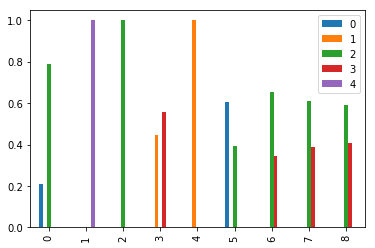

In [27]:
pd1.plot(kind ='bar')


In [28]:
lda_2 = LatentDirichletAllocation(n_components= 5, max_iter=450, 
                                        topic_word_prior= 0.01, 
                                        doc_topic_prior=0.1,
                                        learning_method='batch',
                                        n_jobs= 1,random_state=275)

In [29]:
topic_components_2 = lda_2.fit_transform(X_train_200)

In [30]:
print_top_words(lda_2,vec_200.get_feature_names(), 5) #print the top 5 words!


Topic #0:
spicy rice waiter dish sauce
Topic #1:
korean seafood atmosphere music small
Topic #2:
seafood pot octopus live hot
Topic #3:
seafood sik gaek birthday beef
Topic #4:
thai pad leng curry astoria



In [31]:
pd2= pd.DataFrame(topic_components_2[0:9])

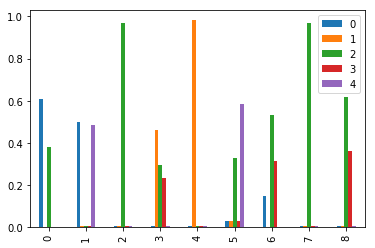

In [32]:
pd2.plot(kind ='bar')


In [33]:
lda_3 = LatentDirichletAllocation(n_components= 5, max_iter=450, 
                                        topic_word_prior= 0.01, 
                                        doc_topic_prior=1,
                                        learning_method='batch',
                                        n_jobs= 1,random_state=275)

In [34]:
topic_components_3 = lda_3.fit_transform(X_train_200)

In [35]:
print_top_words(lda_3,vec_200.get_feature_names(), 5) #print the top 5 words!


Topic #0:
spicy dish rice noodles sauce
Topic #1:
dishes korean give big atmosphere
Topic #2:
seafood pot octopus live hot
Topic #3:
friends table eating beef things
Topic #4:
thai pad leng curry astoria



In [36]:
pd3= pd.DataFrame(topic_components_3[0:9])

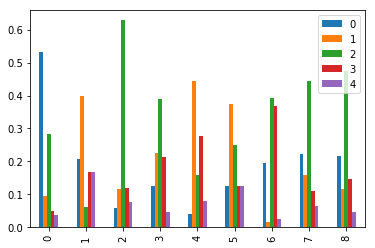

In [37]:
pd3.plot(kind ='bar')

In [38]:
lda_4 = LatentDirichletAllocation(n_components= 5, max_iter=450, 
                                        topic_word_prior= 0.01, 
                                        doc_topic_prior=10,
                                        learning_method='batch',
                                        n_jobs= 1,random_state=275)

In [39]:
topic_components_4 = lda_4.fit_transform(X_train_200)

In [40]:
print_top_words(lda_4,vec_200.get_feature_names(), 5) #print the top 5 words!


Topic #0:
spicy dish rice noodles sauce
Topic #1:
korean dishes big atmosphere meal
Topic #2:
seafood pot octopus live hot
Topic #3:
table huge soju friends give
Topic #4:
thai pad leng curry portions



In [41]:
pd4= pd.DataFrame(topic_components_4[0:9])

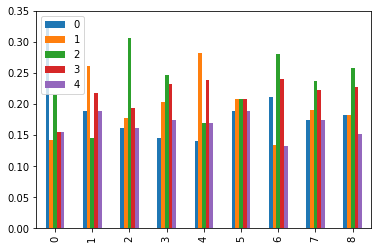

In [42]:
pd4.plot(kind ='bar')

From the bar plots above, we can see that the distribution of topics for the first 9 documents becomes smoother when the document topic priors increase. Mainly, lower alphas indicate that the topics are more distinct and the document contains a mixture of few topics or even a single topic, whereas high alpha implies that the document contains a mix of the most topics. Hence, as alpha goes up most of the documents will contain most of the topics.